Class Labels:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']

Class Counts:
{'angry': 9322, 'disgust': 9021, 'fear': 9098, 'happy': 9929, 'neutral': 12994, 'sad': 9449, 'suprise': 9450}


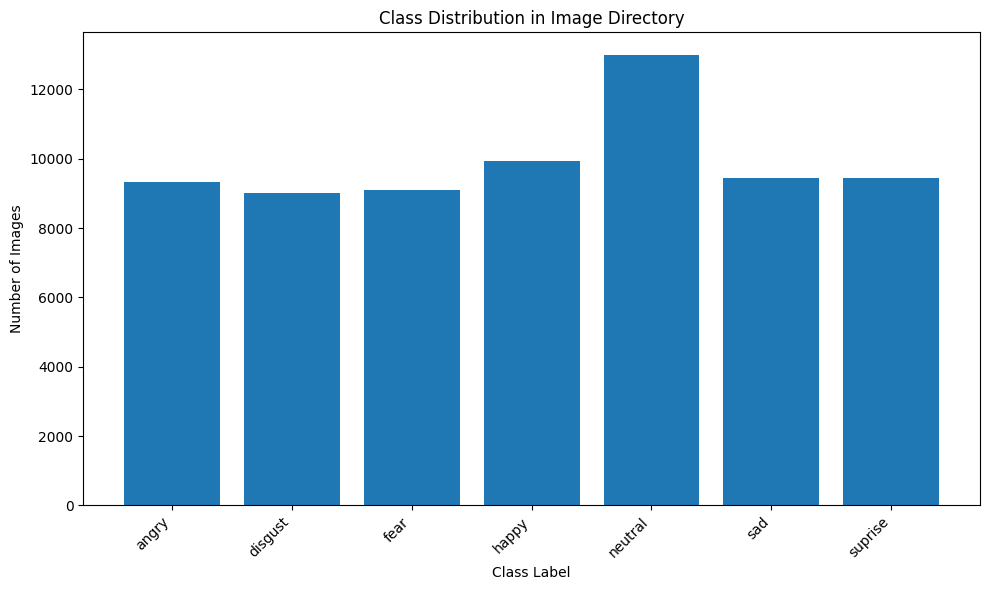

In [1]:
import os
import matplotlib.pyplot as plt

data_dir = "C:/Users/navee/Projects/Brain AI Project/Datasets/FERPLUS/train"

# Get class labels (subdirectory names)
class_labels = os.listdir(data_dir)

# Print class labels
print("Class Labels:")
print(class_labels)

# Section 2: Count images per class
class_counts = {}
for class_label in class_labels:
    class_path = os.path.join(data_dir, class_label)
    num_images = len(os.listdir(class_path)) 
    class_counts[class_label] = num_images

# Print class counts
print("\nClass Counts:")
print(class_counts)

plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts.values())
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Image Directory")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


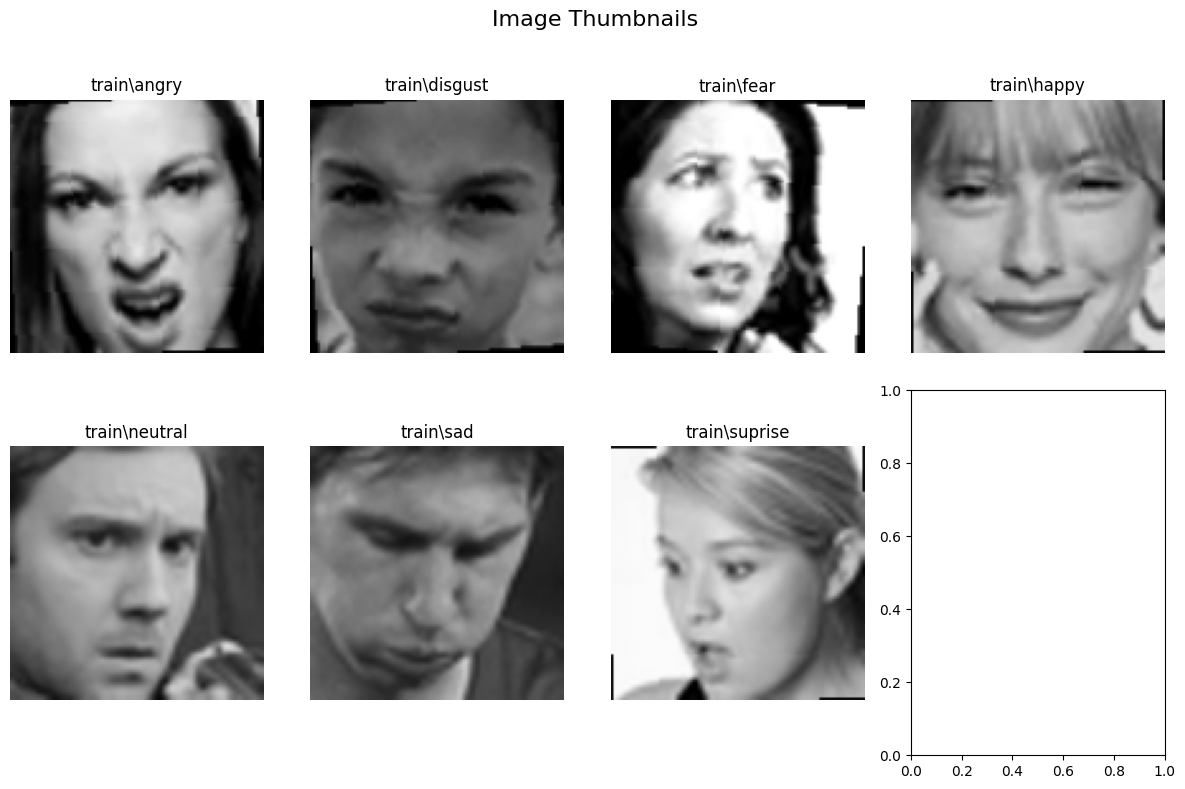

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to create a thumbnail collage
def create_thumbnail_collage(data_dir, num_cols=4, num_rows=2):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    fig.suptitle('Image Thumbnails', fontsize=16)
    axes_flat = axes.ravel()

    # Enumerate through class subdirectories (assuming subdirectories represent classes)
    for i, class_path in enumerate(os.listdir(data_dir)):
        if os.path.isdir(os.path.join(data_dir, class_path)):  # Check if it's a directory
            class_path = os.path.join(data_dir, class_path)

            # Get the first image in the class subdirectory (modify as needed)
            image_path = os.path.join(class_path, os.listdir(class_path)[0])
            image = cv2.imread(image_path)

            # Handle potential errors (e.g., empty subdirectory, corrupted image)
            if image is None:
                print(f"Error loading image: {image_path}")
                continue  # Skip to the next class

            image = cv2.resize(image, (100, 100))  # Resize for thumbnail size
            axes_flat[i].imshow(image)
            axes_flat[i].set_title(class_path.split('/')[-1])  # Extract class label from path
            axes_flat[i].axis('off')  # Hide axes

        if i >= num_cols * num_rows:
            break  # Limit the number of thumbnails

    plt.tight_layout()
    plt.show()

# Example usage
create_thumbnail_collage(data_dir)
